# Montagem da Rede

In [1]:
import pathlib
import pickle
import cpnet
import netpixi
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from netpixi.integration.gt import *
from regression.integration.gt import *
from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


## Leitura dos Dados Pré-Processados

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'projeto' / 'data'
print(DATA_DIR)

/home/jupyter/notebooks/projeto/data


In [3]:
PROCESSED_FILE_PATH = DATA_DIR / 'processed' / 'enem_sampled.pkl'

In [4]:
print(PROCESSED_FILE_PATH)

/home/jupyter/notebooks/projeto/data/processed/enem_sampled.pkl


In [5]:
with open(PROCESSED_FILE_PATH, 'rb') as file:
    (
        sampled_data
    ) = pickle.load(file)


In [6]:
print(sampled_data.shape)
sampled_data.head(5)

(1500, 34)


,NU_INSCRICAO,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,Q001,...,Q019,Q022,Q024,Q025,Gabarito,Gabarito Oficial,Q005_str,Respostas Questionario,Questoes Especificas,Questoes Gerais
2033384,210051501130,CABBBBECEDBADACBEDEACBCCDABCADEDEAACCCBBBCEDE,EDAAAADBCAEBBABEECBBAEEDBBBDCBAABAEDBEBBCAEDB,DCDADCBDAEDBEBBDDBDBBDDAEBBACCDCDBCEBBEB,ACEAEBABDDCDADBACBCBEAADDCEDCDEBEDCABBDBDCDCE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,DBEBBDDBDBBDDAEBBACCDCDBCEBBEB,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,G,...,E,E,C,B,DCDADCBDAEDBEBBDDBDBBDDAEBBACCDCDBCEBBEBEDAAAA...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBABE...,D,DGFOBEDCACBBBBBEECB,DABEDADEBEDBBDBAEDEBBAEDBCABBBBECEDBADACBEDEAC...,DCDADCBDAEDBEBBDBDBBDDEBBACCDCDCBBEBEAAABCABAB...
964551,210054214735,BDABAAAEADCAECEAAAAABECAAABAAAACEBEAABABEABAD,ABAAAAEBBDACAACCAABABBCCABCAAEACAAEAABAAAEAAC,EAAAEAAABADADDDBDBDBAAAEAABAAEAAAAABDEAA,AEABADDEACBBDDAACEAEAAAECABEACACDDAABBBDAEAAA,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,DADDDBDBDBAAAEAABAAEAAAAABDEAA,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,C,...,B,B,A,A,EAAAEAAABADADDDBDBDBAAAEAABAAEAAAAABDEAAABAAAA...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBABE...,D,DCDBABCAABAAABABBAA,BEABBAEAABCACAEAEABAAEAACBDABAAAEADCAECEAAAAAB...,EAAAEAAABADADDDDBDBAAAAABAAEAAAADEAAAAAABBDCAC...
424267,210051721631,DABCBDEBEBADDABDEDDBCCDCAACADEACDECBCCADBEBCB,EBAAEADBCAEBBABEECBAAEEDBBEECCADBCEDBEBBCAEBB,DEBADABDACDEEABDDADBADDDBBBACDDCDECBBBCE,DCEAEBADDBEADCECCBCCEAADDCEDCDEAADDEBBEADEDCE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,DEEABDDADBADDDBBBACDDCDECBBBCE,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,F,...,C,D,D,B,DEBADABDACDEEABDDADBADDDBBBACDDCDECBBBCEEBAAEA...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBABE...,C,CFFGADDBABBBABACDDB,DDEBBADEBEDBEECAEDEBBAEBBDABCBDEBEBADDABDEDDBC...,DEBADABDACDEEABDADBADDBBBACDDCDCBBCEEAAEBCABAB...
935461,210053821250,DACBAEBAECBBDEAEBCDCACDBADECAABDAEACDDEACBECC,EACECCBABEEBDDCCADEDBBACBBAEDDBCEEDDACEBBCACD,DEBECBCBDEBBAAABDDEBCEEAEDAAEAADBBCDDDBE,ADCBBEABEDCBEAABDEBABACEDACBDDADACDBEACDBBDCE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,BBAAABDDEBCEEAEDAAEAADBBCDDDBE,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,B,...,B,B,A,B,DEBECBCBDEBBAAABDDEBCEEAEDAAEAADBBCDDDBEEACECC...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBABE...,F,FBBCABCBBBAAABABBAB,BABDACBEDBCBAEDBDDCEBCACDDACBAEBAECBBDEAEBCDCA...,DEBECBCBDEBBAAADDEBCEEEDAAEAADBCDDBEECECABEBDC...
2691453,210052779578,EDBCACBAECAECBAEEDACCADBCDDEAEBDBCCEDCABBCCAE,CABEEACDBCEADCBACBDEACCAEABEBDEECADBEBCADAECC,EECBCDBBDABBEDCBCBECDADEACACEABDADCABADA,CACDBAEBADBBECAACCDEABDACDDBACCCADEBBCADBBCAE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,BBEDCBCBECDADEACACEABDADCABADA,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,E,...,B,E,B,B,EECBCDBBDABBEDCBCBECDADEACACEABDADCABADACABEEA...,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBABE...,D,DEFCADDBACBBABABEBB,BEDAAACEDCAEBEDEDBBCAAECCEDBCACBAECAECBAEEDACC...,EECBCDBBDABBEDCCBECDADACACEABDACBADACBEEDBCACB...


## Montagem de Rede de Questionário Socioeconômico

In [7]:
quant_candidatos = sampled_data.shape[0]
quant_perguntas = len(sampled_data['Respostas Questionario'].iloc[0])
quant_candidatos, quant_perguntas

(1500, 19)

In [8]:
respostas_questionario_list = sampled_data['Respostas Questionario'].tolist()

Antes de montar a rede por si só, precisamos dar uma olhada nos dados para ver qual a quantidade de perguntas respondidas em comum para que uma aresta possa ser formada

In [9]:
lista_questionario = list()
for id_prova1 in range(quant_candidatos):
    for id_prova2 in range(id_prova1 + 1, quant_candidatos):
        i = 0
        for i_pergunta in range(quant_perguntas):
            if (respostas_questionario_list[id_prova1][i_pergunta] == respostas_questionario_list[id_prova2][i_pergunta]):
                i+=1
        lista_questionario.append(i)

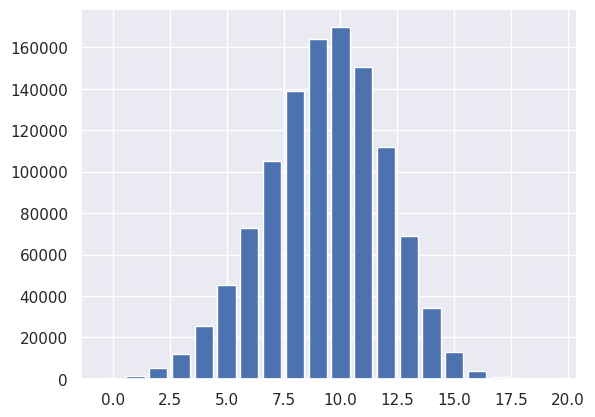

In [10]:
freq_questionario = Counter(lista_questionario)
plt.figure()
plt.bar(freq_questionario.keys(), freq_questionario.values())
plt.show()

In [11]:
print(f'Média: {np.mean(lista_questionario)}')
print(f'Quartis: {np.quantile(lista_questionario, [0,0.25,0.5,0.75,1])}')

Média: 9.325327106960195
Quartis: [ 0.  8.  9. 11. 19.]


In [12]:
freq_questionario

Counter({3: 12141,
         7: 105214,
         2: 5318,
         10: 169929,
         9: 163907,
         6: 72740,
         5: 45409,
         4: 25316,
         8: 139157,
         11: 150764,
         1: 1522,
         12: 111841,
         0: 166,
         14: 33976,
         15: 13089,
         13: 69066,
         16: 3815,
         17: 776,
         18: 99,
         19: 5})

A máquina disponível começa a travar depois de 50.000 arestas... vamos ver então o número mínimo de resostas iguais para fazer com que seja essa a quantidade de arestas

In [13]:
quant_arestas = 0
max_resps_iguais = 0
for i in range(len(freq_questionario)):
    quant_arestas += freq_questionario[quant_perguntas - i]
    if quant_arestas > 50000:
        print(f'Travou em {19 - i} com {quant_arestas}')
        max_resps_iguais = 19 - i
        break

Travou em 14 com 51760


Vamos tentar fazer um grafo em que há vértices se as dupla de candidatos respondeu à mais de 14 perguntas do questionário socioeconômico da mesma forma

In [14]:
arestas_questionario = list()
for id_prova1 in range(quant_candidatos):
    for id_prova2 in range(id_prova1 + 1, quant_candidatos):
        i = 0
        for i_pergunta in range(quant_perguntas):
            if (respostas_questionario_list[id_prova1][i_pergunta] == respostas_questionario_list[id_prova2][i_pergunta]):
                i+=1
        if i >= max_resps_iguais:
            arestas_questionario.append((id_prova1, id_prova2))

In [15]:
g_quest = Graph(directed=False) # Não-dirigido

for aresta in arestas_questionario:
    if not(g_quest.has_vertex(aresta[0])):
        g_quest.add_vertex(aresta[0])
    if not(g_quest.has_vertex(aresta[1])):
        g_quest.add_vertex(aresta[1])
    if not (g_quest.has_edge(aresta[0], aresta[1])):
        g_quest.add_edge(aresta[0], aresta[1])

In [16]:
gt_save(g_quest, 'grafo_questionario1500.net.gz')

In [17]:
n = g_quest.num_vertices()
m = g_quest.num_edges()
max_edges = n * (n - 1) // 2
d = m / max_edges

print(f'Número de vértices: {n}')
print(f'Número de arestas: {m}')
print(f'Número máximo de arestas (gráfico não dirigido): {max_edges}')
print(f'Densidade: {d}')

Número de vértices: 1464
Número de arestas: 51760
Número máximo de arestas (gráfico não dirigido): 1070916
Densidade: 0.048332455580082846


count    1464.000000
mean       70.710383
std        62.348519
min         1.000000
25%        21.000000
50%        53.500000
75%       104.000000
max       327.000000
Name: degree, dtype: float64

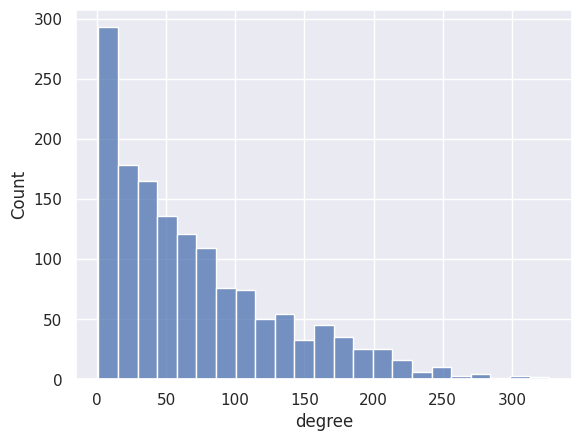

In [18]:
# Função para formatar propriedades dos vértices
data = gt_data(g_quest)

# Soma do in-degree com o out-degree
degrees = []
for v in g_quest.all_vertices():
    degrees.append(v.total_degree())

# Adicionando métricas ao df
data['degree'] = degrees

# Visualizando histograma do degree
sns.histplot(data['degree'])
data['degree'].describe()

In [19]:
# Método que aproxima e afasta vértices dependendo se estão ou não conectados, respectivamente
g_quest_SFDP = gt_load('grafo_questionario1500.net.gz')
g_quest_SFDP = gt_clean(g_quest_SFDP)
m = gt_draw.sfdp_layout(g_quest_SFDP)
gt_move(g_quest_SFDP, m)
gt_save(g_quest_SFDP, 'SFDP_grafo_questionario1500.net.gz')

In [20]:
#r = netpixi.render('SFDP_grafo_questionario1500.net.gz', infinite=True)

Alterando o tamanho dos vértices para evidenciar quem é mais de centro

In [39]:
# matrix = spectral.adjacency(g_quest_SFDP)

# algorithm = cpnet.Rombach()
# algorithm.detect(matrix)
# c = algorithm.get_coreness()

# g_quest_SFDP.add_vp('coreness')
# for i, coreness in c.items():
#     v = g_quest_SFDP.get_vertex_by_index(i)
#     v['coreness'] = float(coreness)

# for v in g_quest_SFDP.all_vertices():
#     r.vertex(v['id'], size=(10 + 40 * v['coreness']))

Observando novamente o grafo, observa-se que há pessoas que são mais centrais do que outras. Podemos investigar quem são.

In [22]:
# c

## Montagem da Rede de Conhecimentos Gerais

In [23]:
sampled_data.columns

Index(['NU_INSCRICAO', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'Q001', 'Q002', 'Q005', 'Q006', 'Q007', 'Q008',
       'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
       'Q019', 'Q022', 'Q024', 'Q025', 'Gabarito', 'Gabarito Oficial',
       'Q005_str', 'Respostas Questionario', 'Questoes Especificas',
       'Questoes Gerais'],
      dtype='object')

In [24]:
quant_questoes_gerais = len(sampled_data['Questoes Gerais'].iloc[0])
quant_candidatos, quant_questoes_gerais

(1500, 71)

In [25]:
questoes_gerais = sampled_data['Questoes Gerais'].tolist()

In [26]:
lista_n_respostas_iguais = list()
for id_prova1 in range(quant_candidatos):
    for id_prova2 in range(id_prova1 + 1, quant_candidatos):
        i = 0
        for i_pergunta in range(quant_questoes_gerais):
            if (questoes_gerais[id_prova1][i_pergunta] == questoes_gerais[id_prova2][i_pergunta]):
                i+=1
        lista_n_respostas_iguais.append(i)

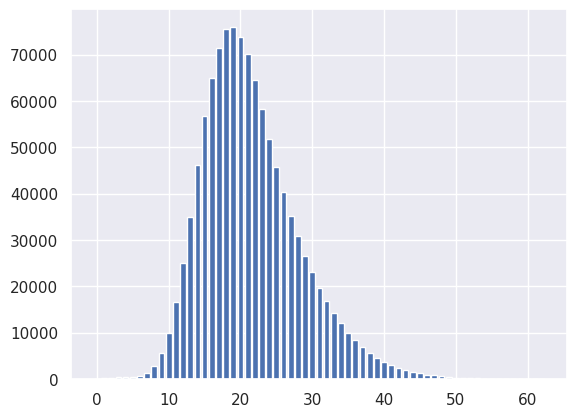

In [27]:
freq_prova = Counter(lista_n_respostas_iguais)
plt.figure()
plt.bar(freq_prova.keys(), freq_prova.values())
plt.show()

In [28]:
print(f'Média: {np.mean(lista_n_respostas_iguais)}')
print(f'Quartis: {np.quantile(lista_n_respostas_iguais, [0,0.25,0.5,0.75,1])}')

Média: 21.477320880587058
Quartis: [ 0. 17. 20. 25. 62.]


In [29]:
max(freq_prova)

62

In [30]:
freq_prova[0]

14

In [31]:
quant_arestas_geral = 0
threshold = 0
for i in range(len(freq_prova)):
    quant_arestas_geral += freq_prova[max(freq_prova) - i]
    if quant_arestas_geral > 50000:
        print(f'Travou em {max(freq_prova) - i} com {quant_arestas_geral}')
        threshold = max(freq_prova) - i
        break

Travou em 35 com 52056


In [32]:
arestas_geral = list()
for id_prova1 in range(quant_candidatos):
    for id_prova2 in range(id_prova1 + 1, quant_candidatos):
        i = 0
        for i_pergunta in range(quant_questoes_gerais):
            if (questoes_gerais[id_prova1][i_pergunta] == questoes_gerais[id_prova2][i_pergunta]):
                i+=1
        if i >= threshold:
            arestas_geral.append((id_prova1, id_prova2))

In [33]:
len(arestas_geral)

52056

In [34]:
g_geral = Graph(directed=False)

for aresta in arestas_geral:
    if not(g_geral.has_vertex(aresta[0])):
        g_geral.add_vertex(aresta[0])
    if not(g_geral.has_vertex(aresta[1])):
        g_geral.add_vertex(aresta[1])
    if not (g_geral.has_edge(aresta[0], aresta[1])):
        g_geral.add_edge(aresta[0], aresta[1])

In [35]:
gt_save(g_geral, 'grafo_geral.net.gz')

In [36]:
n = g_geral.num_vertices()
m = g_geral.num_edges()
max_edges = n * (n - 1) // 2
d = m / max_edges

print(f'Número de vértices: {n}')
print(f'Número de arestas: {m}')
print(f'Número máximo de arestas (gráfico não dirigido): {max_edges}')
print(f'Densidade: {d}')

Número de vértices: 828
Número de arestas: 52056
Número máximo de arestas (gráfico não dirigido): 342378
Densidade: 0.15204247936491247


count    828.000000
mean     125.739130
std      131.355162
min        1.000000
25%        8.000000
50%       78.000000
75%      223.000000
max      453.000000
Name: degree, dtype: float64

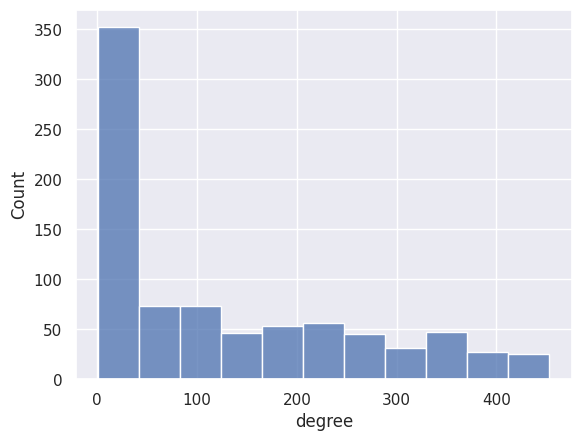

In [37]:
# Função para formatar propriedades dos vértices
data = gt_data(g_geral)

# Soma do in-degree com o out-degree
degrees = []
for v in g_geral.all_vertices():
    degrees.append(v.total_degree())

# Adicionando métricas ao df
data['degree'] = degrees

# Visualizando histograma do degree
sns.histplot(data['degree'])
data['degree'].describe()

In [38]:
# Método que aproxima e afasta vértices dependendo se estão ou não conectados, respectivamente
g_geral_SFDP = gt_load('grafo_geral.net.gz')
g_geral_SFDP = gt_clean(g_geral_SFDP)
m = gt_draw.sfdp_layout(g_geral_SFDP)
gt_move(g_geral_SFDP, m)
gt_save(g_geral_SFDP, 'SFDP_grafo_geral.net.gz')

In [ ]:
# r = netpixi.render('SFDP_grafo_questionario.net.gz', infinite=True)

In [40]:
# matrix = spectral.adjacency(g_geral_SFDP)

# algorithm = cpnet.Rombach()
# algorithm.detect(matrix)
# c = algorithm.get_coreness()

# g_geral_SFDP.add_vp('coreness')

# try:
#     for i, coreness in c.items():
#         v = g_geral_SFDP.get_vertex_by_index(i)
#         v['coreness'] = float(coreness)

#     for v in g_geral_SFDP.all_vertices():
#         r.vertex(v['id'], size=(10 + 40 * v['coreness']))
# except:
#     pass

## Apêndice: Por que não usamos uma só questão?

A quantidade de arestas é muito alta mesmo para a menor quantidade de respostas iguais!

In [ ]:
for n, questao in enumerate(lista_questoes):
#     print(n)
    freq = Counter(lista_respostas[n])
    plt.figure()
    plt.bar(freq.keys(), freq.values())
    plt.xlabel(f'Número de respostas iguais da {questao}')
    plt.ylabel('Frequencia')
    plt.title(f'Frequencia de respostas iguais da {questao}')
plt.show()

In [ ]:
colunas_viaveis = dict()
for n, questao in enumerate(lista_questoes):
    freq = Counter(lista_respostas[n])
    soma_arestas = 0
    lista_colunas = list()
    for i in range(len(freq)):
        soma_arestas += freq[i]
        print(questao, soma_arestas)
        if soma_arestas > 70000:
            break
        lista_colunas.append(i)
    colunas_viaveis[questao] = lista_colunas

In [ ]:
print(colunas_viaveis)